# EDA

In [ ]:
import pandas as pd
import json

with open('/content/poetry_data_train.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [ ]:
df = pd.DataFrame(data)

df

,url,rating,views,output_text,genre
0,https://www.chitalnya.ru/work/3180020/,29,33,Люблю ли осень? Ты спроси у ели -\nОна в колюч...,лирика
1,https://www.chitalnya.ru/work/2496512/,0,29,Подруга - злая похмелюга\nУжасно вредная порой...,юмор
2,https://www.chitalnya.ru/work/2300891/,73,110,На качелях настроенья\nМы сегодня улетели\nВ р...,лирика
3,https://www.chitalnya.ru/work/3109869/,44,67,"Знаешь, Света, с тобой мне просто:\nУ тебя жив...",лирика
4,https://www.chitalnya.ru/work/3382840/,0,12,"Клянемся, будем помнить погибших мы всегда,\nИ...",лирика
...,...,...,...,...,...
138391,https://www.chitalnya.ru/work/1153818/,0,136,Как трудно мне определиться -\nЧервяк я в жизн...,юмор
138392,https://www.chitalnya.ru/work/2873976/,74,84,"Осенний дождь... Холодный. Хмурый.\nСтучит, ст...",лирика
138393,https://www.chitalnya.ru/work/3140150/,0,10,"Ничто не проходит бесследно и даром\nНичто, ни...",лирика
138394,https://www.chitalnya.ru/work/2433508/,30,88,"Я предам тебя сейчас,\nКину в радости и в горе...",лирика


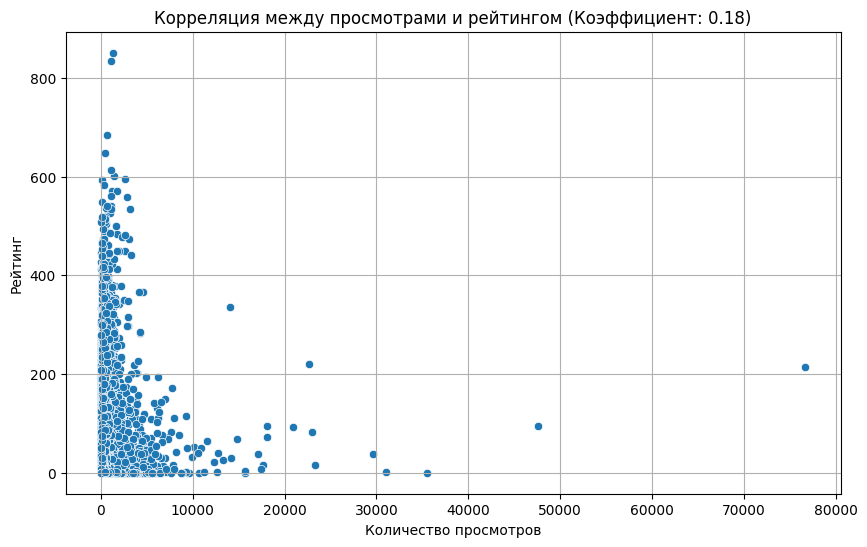

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='views', y='rating', marker='o')

correlation = df['views'].corr(df['rating'])
plt.title(f'Корреляция между просмотрами и рейтингом (Коэффициент: {correlation:.2f})')
plt.xlabel('Количество просмотров')
plt.ylabel('Рейтинг')
plt.grid()
plt.show()


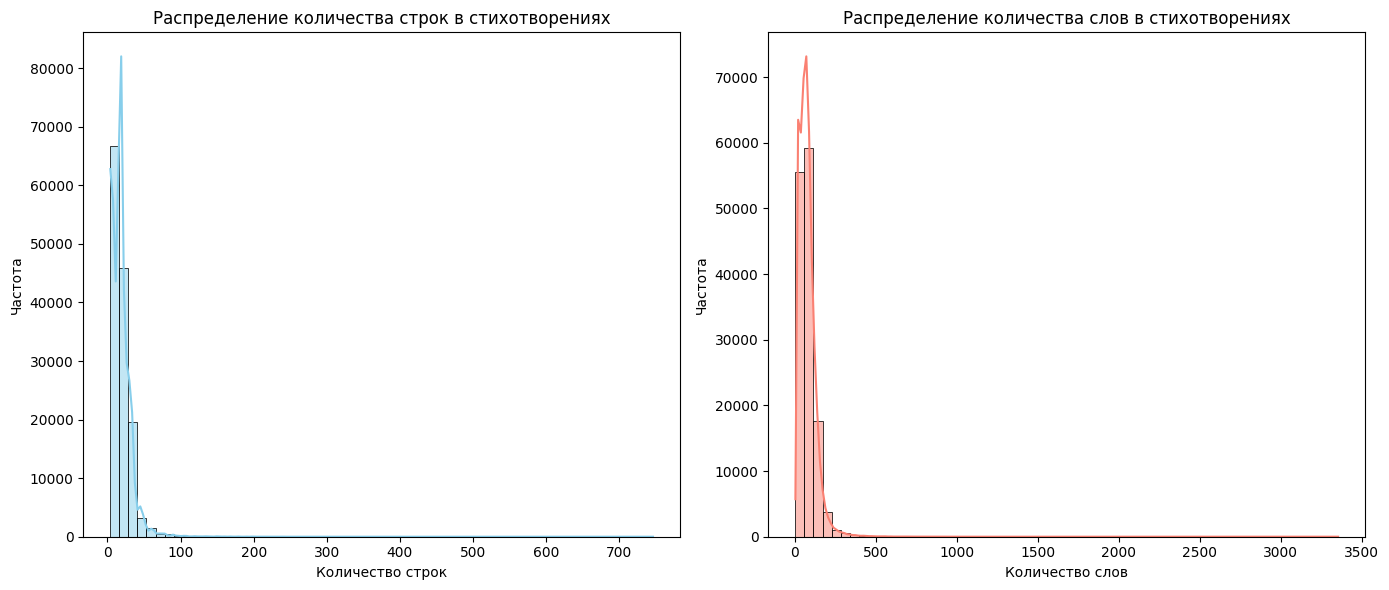

In [ ]:
df['line_count'] = df['output_text'].apply(lambda x: x.count('\n') + 1)  # Количество строк
df['word_count'] = df['output_text'].apply(lambda x: len(x.split()))  # Количество слов

# Построение распределения длины стихотворений
plt.figure(figsize=(14, 6))

# Подграфик для количества строк
plt.subplot(1, 2, 1)
sns.histplot(df['line_count'], bins=60, kde=True, color='skyblue')
plt.title('Распределение количества строк в стихотворениях')
plt.xlabel('Количество строк')
plt.ylabel('Частота')

# Подграфик для количества слов
plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=60, kde=True, color='salmon')
plt.title('Распределение количества слов в стихотворениях')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [ ]:
average_line_count = df['line_count'].mean()
median_line_count = df['line_count'].median()
average_word_count = df['word_count'].mean()
median_word_count = df['word_count'].median()

print(f'Среднее количество строк: {average_line_count}')
print(f'Медиана количества строк: {median_line_count}')
print(f'Среднее количество слов: {average_word_count}')
print(f'Медиана количества слов: {median_word_count}')

Среднее количество строк: 19.05589034365155
Медиана количества строк: 17.0
Среднее количество слов: 78.67650799156046
Медиана количества слов: 70.0


<ipython-input-38-8971a0c32e84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rating_bins'] = pd.cut(filtered_df['rating'], bins=bins, labels=labels)
<ipython-input-38-8971a0c32e84>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


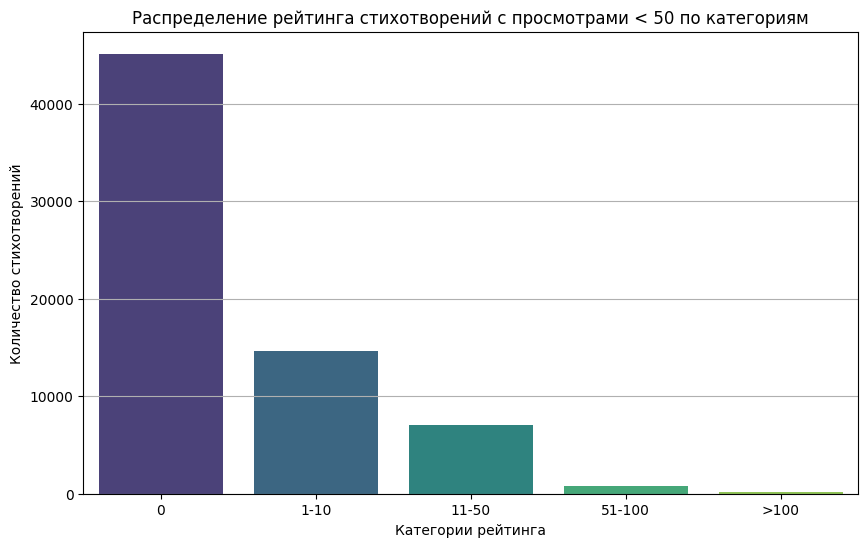

In [ ]:
filtered_df = df[df['views'] < 50]

bins = [-1, 0, 10, 50, 100, float('inf')]  # Определение границ бинов
labels = ['0', '1-10', '11-50', '51-100', '>100']  # Названия бинов
filtered_df['rating_bins'] = pd.cut(filtered_df['rating'], bins=bins, labels=labels)

rating_counts = filtered_df['rating_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

plt.title('Распределение рейтинга стихотворений с просмотрами < 50 по категориям')
plt.xlabel('Категории рейтинга')
plt.ylabel('Количество стихотворений')
plt.grid(axis='y')
plt.show()

In [ ]:
total_poems = len(df)
print(f"Общее количество стихотворений: {total_poems}")

df['rating'] = pd.to_numeric(df['rating'])

stats = df[['rating', 'views']].describe()
print("Основные статистические показатели:\n", stats)

Общее количество стихотворений: 138396
Основные статистические показатели:
               rating          views
count  138396.000000  138396.000000
mean       11.920265     132.442289
std        32.553441     458.416320
min         0.000000      10.000000
25%         0.000000      22.000000
50%         0.000000      51.000000
75%         8.000000     135.000000
max       851.000000   76680.000000


In [ ]:
missing_values = df.isnull().sum()
print("Количество пропусков в каждом столбце:\n", missing_values)

Количество пропусков в каждом столбце:
 url            0
rating         0
views          0
output_text    0
genre          0
dtype: int64


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Загрузка модели
model_checkpoint = 'cointegrated/rubert-tiny-toxicity'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/377 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.2M [00:00<?, ?B/s]

In [ ]:
def text2toxicity(text, aggregate=True):
    """ Calculate toxicity of a text (if aggregate=True) or a vector of toxicity aspects (if aggregate=False)"""
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()
    if isinstance(text, str):
        proba = proba[0]
    if aggregate:
        return 1 - proba.T[0] * (1 - proba.T[-1])
    return proba

In [ ]:
from tqdm import tqdm

toxicity_threshold = 0.9

toxic_scores = []

toxic_count = 0

for poem in tqdm(data, desc="Обработка стихотворений"):
    toxicity_score = text2toxicity(poem['output_text'], True)
    toxic_scores.append(toxicity_score)
    if toxicity_score >= toxicity_threshold:
        toxic_count += 1

print(f"Количество токсичных стихотворений: {toxic_count}")

Не хватило ресурсов/времени прогнать на всем датасете.